In [71]:
# 初步思路
# 利用该数据集，可以完成以下简单的商业分析任务，通过数据分析和可视化展示，充分挖掘数据的价值，让数据更好地为业务服务：

# 流量分析：PV/UV是多少，通过分析PV/UV能发现什么规律？
# 漏斗分析：用户“浏览-收藏-加购-购买”的转化率是怎样的？哪一步的折损比例最大？
# 用户价值分析：对电商平台什么样的用户是有价值的？如果我作为商家，要重点关注哪部分用户？

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 画图的主题设计
sns.set_theme()
sns.set_context('notebook')

In [5]:
# 加载数据
data_user = pd.read_csv("C:\\Users\\ASUS\\Desktop\\数据分析\\淘宝用户购物行为数据可视化分析\\数据集\\user_action.csv")
data_user.head(20)

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20
2,98607707,64749712,1,2883,2014-12-18 11
3,98662432,320593836,1,6562,2014-12-06 10
4,98145908,290208520,1,13926,2014-12-16 21
5,93784494,337869048,1,3979,2014-12-03 20
6,94832743,105749725,1,9559,2014-12-13 20
7,95290487,76866650,1,10875,2014-11-27 16
8,96610296,161166643,1,3064,2014-12-11 23
9,100684618,21751142,3,2158,2014-12-05 23


In [6]:
# 查看数据集量级
print("整体数据集的大小为：",len(data_user))
print("数据集中的用户数：",len(set(data_user['user_id'])))
print("数据集中的商品数量：",len(set(data_user['item_id'])))
print("数据集中商品类别数量是：",len(set(data_user['item_category'])))

整体数据集的大小为： 12256906
数据集中的用户数： 10000
数据集中的商品数量： 2876947
数据集中商品类别数量是： 8916


In [9]:
# 查看数据缺失情况
data_user.isnull().sum()

user_id          0
item_id          0
behavior_type    0
item_category    0
time             0
dtype: int64

In [10]:
# 分割天(date)和小时(hour)
data_user['date'] = data_user['time'].map(lambda x: x.split(' ')[0])
data_user['hour'] = data_user['time'].map(lambda x: x.split(' ')[1])
data_user.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,1,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21,2014-12-16,21


In [12]:
# 查看字段类型
data_user.dtypes

user_id           int64
item_id           int64
behavior_type     int64
item_category     int64
time             object
date             object
hour             object
dtype: object

In [14]:
data_user['user_id'] = data_user['user_id'].astype('object')
data_user['item_id'] = data_user['item_id'].astype('object')
data_user['item_category'] = data_user['item_category'].astype('object')
data_user['date'] = pd.to_datetime(data_user['date'])
data_user['hour'] = data_user['hour'].astype('int64') 

data_user.dtypes


user_id                  object
item_id                  object
behavior_type             int64
item_category            object
time                     object
date             datetime64[ns]
hour                      int64
dtype: object

# Part1. 流量分析

关注访问量(PV)与独立访问量(UV)：

访问量(PV)：全名为PageView, 基于用户每次对淘宝页面的刷新次数，用户每刷新一次页面或者打开新的页面就记录就算一次访问。
独立访问量(UV)：全名为UniqueVisitor，一个用户若多次访问淘宝只记录一次，本质上是unique操作。

In [17]:
# 计算PV：PageView，UV：UniqueView
# PV：select count(user_id) from data_user group by "date"
# UV:select count(distinct(user_id)) from data_user group by "date"

pv_daily = data_user.groupby('date')['user_id'].count()
# pv_daily.head()
pv_daily = pv_daily.reset_index()
pv_daily = pv_daily.rename(columns={'user_id':'pv_daily'})
pv_daily

,date,pv_daily
0,2014-11-18,366701
1,2014-11-19,358823
2,2014-11-20,353429
3,2014-11-21,333104
4,2014-11-22,361355
5,2014-11-23,382702
6,2014-11-24,378342
7,2014-11-25,370239
8,2014-11-26,360896
9,2014-11-27,371384


In [18]:
# 计算UV
uv_daily = data_user.groupby('date')['user_id'].apply(lambda x: len(x.unique()))
uv_daily = uv_daily.reset_index()
uv_daily = uv_daily.rename(columns = {'user_id':'uv_daily'})
uv_daily

,date,uv_daily
0,2014-11-18,6343
1,2014-11-19,6420
2,2014-11-20,6333
3,2014-11-21,6276
4,2014-11-22,6187
5,2014-11-23,6373
6,2014-11-24,6513
7,2014-11-25,6351
8,2014-11-26,6357
9,2014-11-27,6359


Text(0.5, 1.0, 'uv_daily')

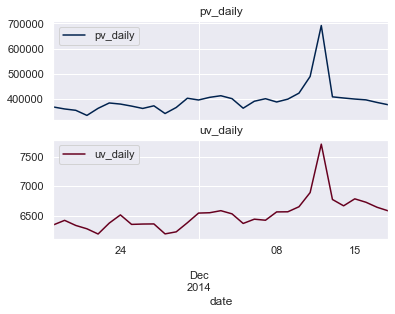

In [21]:
# 可视化
fig,axes = plt.subplots(2,1,sharex=True)
# pv_daily:pandas 对象
# Matplotlib,Pandas,histplot:柱状图
pv_daily.plot(x='date',y='pv_daily',ax=axes[0],colormap='cividis')
uv_daily.plot(x='date',y='uv_daily',ax=axes[1],colormap='RdGy')
axes[0].set_title('pv_daily')
axes[1].set_title('uv_daily')

可以看出，不管是PV还是UV趋势，均在12号的时候出现了一个尖峰，这正是著名的“双十二”活动的用户集中消费导致的变化。通过简单的数据分析和可视化工具，这是从数据中观察到的第一个结论。

# 2.基于小时级别访问流量分析

In [22]:
# 计算每个小时的PV
pv_hour = data_user.groupby('hour')['user_id'].count()
pv_hour = pv_hour.reset_index()
pv_hour = pv_hour.rename(columns={'user_id':'pv_hour'})
pv_hour

,hour,pv_hour
0,0,517404
1,1,267682
2,2,147090
3,3,98516
4,4,80487
5,5,88296
6,6,158798
7,7,287337
8,8,396106
9,9,485951


In [23]:
# 计算每个小时的UV
uv_hour = data_user.groupby('hour')['user_id'].apply(lambda x: len(x.unique()))
uv_hour = uv_hour.reset_index()
uv_hour = uv_hour.rename(columns={'user_id':'uv_hour'})
uv_hour

,hour,uv_hour
0,0,5786
1,1,3780
2,2,2532
3,3,1937
4,4,1765
5,5,2030
6,6,3564
7,7,5722
8,8,7108
9,9,7734


Text(0.5, 1.0, 'uv_hour')

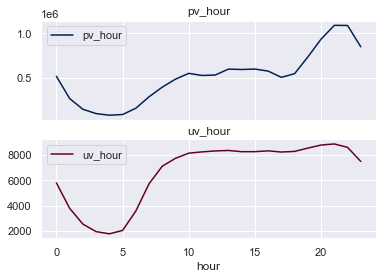

In [25]:
# 可视化
fig,axes = plt.subplots(2,1,sharex=True)
pv_hour.plot(x='hour',y='pv_hour',ax=axes[0],colormap='cividis')
uv_hour.plot(x='hour',y='uv_hour',ax=axes[1],colormap='RdGy')
axes[0].set_title('pv_hour')
axes[1].set_title('uv_hour')



可以看出，PV的高峰值出现在20点之后，可能的原因是淘宝的主力消费人群是工薪阶层，这部分群体在下班后开始使用淘宝浏览购物；UV的值比较恒定，上午10点之后便没有出现大的波动，一个可能的原因是用户早晨也会刷一下淘宝，比如看看物流状态，UV值在一天之内就不会再有大的变化波动了。 另外也可以看出，凌晨2点之后，PV/UV的趋势一致，均是一天中流量最小的时间段。

In [26]:
# “双十二”当天基于小时的用户访问数据变化
data_user_1212 = data_user.loc[data_user['date']=='2014-12-12']
data_user_1212

,user_id,item_id,behavior_type,item_category,time,date,hour
13,101260672,212072908,1,10984,2014-12-12 11,2014-12-12,11
20,101781721,19349307,1,1863,2014-12-12 12,2014-12-12,12
54,100684618,94486594,1,10984,2014-12-12 23,2014-12-12,23
69,103802946,190848347,1,5232,2014-12-12 22,2014-12-12,22
95,104811265,354843735,1,10585,2014-12-12 21,2014-12-12,21
...,...,...,...,...,...,...,...
12256729,79359253,69183918,1,1863,2014-12-12 19,2014-12-12,19
12256874,91530370,181004546,1,12758,2014-12-12 23,2014-12-12,23
12256878,91530370,170765640,1,3381,2014-12-12 00,2014-12-12,0
12256896,91530370,94732789,1,12090,2014-12-12 23,2014-12-12,23


In [72]:
# 计算每小时的PV
pv_hour_1212 = data_user_1212.groupby('hour')['user_id'].count()
pv_hour_1212 = pv_hour_1212.reset_index()
pv_hour_1212 = pv_hour_1212.rename(columns={'user_id':'1212_pv_hour'})
uv_hour_1212 = data_user_1212.groupby('hour')['user_id'].apply(lambda x: len(x.unique())).reset_index().rename(columns={'user_id':'1212_uv_hour'})
pv_hour_1212

,hour,1212_pv_hour
0,0,50030
1,1,22761
2,2,11754
3,3,6173
4,4,5168
5,5,6417
6,6,12820
7,7,22177
8,8,28156
9,9,32695


和30日总体的小时级别PV/UV变化趋势做对比

Text(0.5, 1.0, 'pv_hour_1212')

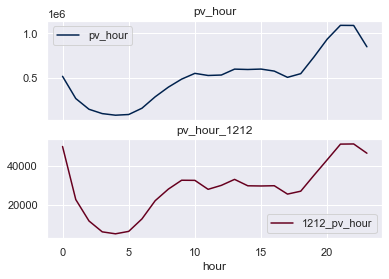

In [30]:
# 可视化PV
fig,axes = plt.subplots(2,1,sharex=True)
pv_hour.plot(x='hour',y='pv_hour',ax=axes[0],colormap='cividis')
pv_hour_1212.plot(x='hour',y='1212_pv_hour',ax=axes[1],colormap='RdGy')
axes[0].set_title('pv_hour')
axes[1].set_title('pv_hour_1212')

Text(0.5, 1.0, 'uv_hour')

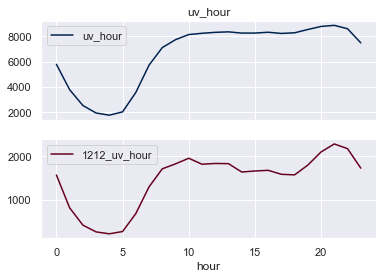

In [31]:
# 可视化UV
fig, axes = plt.subplots(2,1,sharex=True)
uv_hour.plot(x='hour',y='uv_hour',ax=axes[0],colormap='cividis')
uv_hour_1212.plot(x='hour', y='1212_uv_hour', ax=axes[1],colormap='RdGy')
axes[0].set_title('uv_hour')

可以看到，双十二当天，PV变化趋与一个月内的PV变化趋势基本一致，只不过曲线不太平滑，多出来小的凸点，一个可能的原因是大促当天，有整点领券活动，通过推送等形式会有效拉动用户使用淘宝。UV变化趋势稍有不同，可以看到双十二当天在晚上8点之后UV出现了小高峰，表明了大促当天用户的消费意愿还是比较强烈。

# 3.不同用户行为流量分析

为了获得用户的行为模式，主要统计在一天当中（按照每小时）用户发生的行为，因此使用groupby进行数据分组

In [33]:
# 基于behavior-type & hour 分组
# 浏览、收藏、加购物车、购买四种行为，分别用数字1、2、3、4表示
pv_behavior = data_user.groupby(['behavior_type','hour'])['user_id'].count()
pv_behavior = pv_behavior.reset_index()
pv_behavior = pv_behavior.rename(columns={'user_id':'pv_behavior'})
pv_behavior

,behavior_type,hour,pv_behavior
0,1,0,487341
1,1,1,252991
2,1,2,139139
3,1,3,93250
4,1,4,75832
...,...,...,...
91,4,19,6352
92,4,20,7872
93,4,21,8829
94,4,22,8845


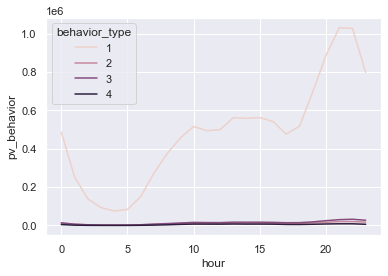

In [74]:
# 可视化
# sns：serborn
ax = sns.lineplot(x='hour',y='pv_behavior',hue='behavior_type',data=pv_behavior)

因为action_type为1（浏览行为）的占比非常大，导致图中其他几类action的趋势不太明显。

<AxesSubplot:xlabel='hour', ylabel='pv_behavior'>

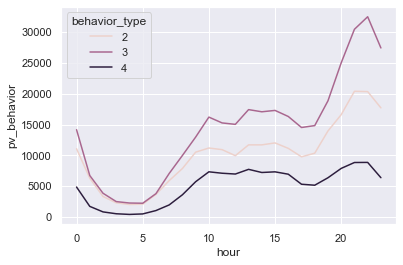

In [35]:
# 去掉action_type为1的数据
sns.lineplot(x='hour',y='pv_behavior',hue='behavior_type',data=pv_behavior[pv_behavior.behavior_type!=1])

可以看出4种行为按照小时的变化趋势基本一致，都是在晚上8点之后有明显增长，凌晨2-6点是低峰，符合常识。

基于双十二当天的数据来分析这4中行为的变化趋势

In [39]:
# 基于behavior-type & hour 分组
# 浏览、收藏、加购物车、购买四种行为，分别用数字1、2、3、4表示
pv_behavior_1212 = data_user_1212.groupby(['behavior_type','hour'])['user_id'].count()
pv_behavior_1212 = pv_behavior_1212.reset_index()
pv_behavior_1212 = pv_behavior_1212.rename(columns={'user_id':'pv_behavior_1212'})
pv_behavior_1212

,behavior_type,hour,pv_behavior_1212
0,1,0,45229
1,1,1,20988
2,1,2,10896
3,1,3,5762
4,1,4,4827
...,...,...,...
91,4,19,577
92,4,20,643
93,4,21,850
94,4,22,985


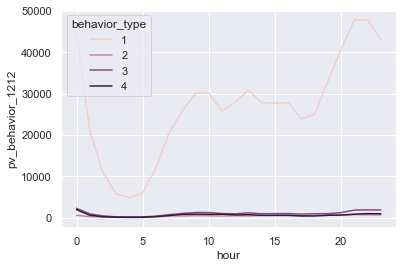

In [40]:
# 可视化
# sns：serborn
ax_1212 = sns.lineplot(x='hour',y='pv_behavior_1212',hue='behavior_type',data=pv_behavior_1212)

<AxesSubplot:xlabel='hour', ylabel='pv_behavior_1212'>

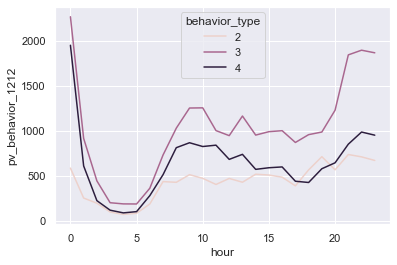

In [41]:
# 去掉action_type为1的数据
sns.lineplot(x='hour',y='pv_behavior_1212',hue='behavior_type',data=pv_behavior_1212[pv_behavior_1212.behavior_type!=1])

可以看出在双十二当天零点开始，购买是大于加购物车的，一个可能的原因是零点领券活动。整体来看，这一天大部分时间购买是大于加购物车的，可能是双十二活动当天大促销。

# Part2.转化率分析

分析“浏览-收藏-加购物车-购买”链路的转化漏斗模型，可以帮助我们更好的了解各个环节的转化链路

In [42]:
behavior_type = data_user.groupby(['behavior_type'])['user_id'].count()
behavior_type

behavior_type
1    11550581
2      242556
3      343564
4      120205
Name: user_id, dtype: int64

可以看到，用户浏览（action_type=1）的基数是最大的，由于加购物车和收藏没有必然联系，因此把这两类合并在一起来做分析。

In [44]:
click_num,fav_num,add_num,pay_num = behavior_type[1],behavior_type[2],behavior_type[3],behavior_type[4]
fav_add_num = fav_num + add_num
print("浏览到加购物车&收藏转化率:",100*fav_add_num/click_num)
print("浏览到购买转化率:",100*pay_num/click_num)
print("加购物车&收藏到购买转化率:",100*pay_num/fav_add_num)

浏览到加购物车&收藏转化率: 5.074376778103197
浏览到购买转化率: 1.0406835811982098
加购物车&收藏到购买转化率: 20.508598921722513


分析双十二当天的数据

In [47]:
behavior_type_1212 = data_user_1212.groupby(['behavior_type'])['user_id'].count()
behavior_type_1212

behavior_type
1    641507
2     10446
3     24508
4     15251
Name: user_id, dtype: int64

In [48]:
click_num_1212,fav_num_1212,add_num_1212,pay_num_1212 = behavior_type_1212[1],behavior_type_1212[2],behavior_type_1212[3],behavior_type_1212[4]
fav_add_num_1212 = fav_num_1212 + add_num_1212
print("浏览到加购物车&收藏转化率:",100*fav_add_num_1212/click_num_1212)
print("浏览到购买转化率:",100*pay_num_1212/click_num_1212)
print("加购物车&收藏到购买转化率:",100*pay_num_1212/fav_add_num_1212)

浏览到加购物车&收藏转化率: 5.448732437837779
浏览到购买转化率: 2.3773707847303305
加购物车&收藏到购买转化率: 43.631630142472964


可以看出，双十二当天，加购物车&收藏到购买转化率是平时的2倍之多，此外，浏览到加购物车&收藏的转化率也比平时高出不少，说明大促的运营活动对用户活跃度的转化起到了很好的促进作用。因此，对于商家来说，可以考虑在特定节日退出特定主题的优惠活动，是个有效的促活、转化的方式。

# Part3.用户价值分析

# 4.用户购买频次分析

In [49]:
# 浏览 >> 加购物车&收藏 >> 购买
data_user_buy = data_user[data_user.behavior_type==4].groupby('user_id')['behavior_type'].count()
data_user_buy

user_id
4913          6
6118          1
7528          6
7591         21
12645         8
             ..
142376113     1
142412247    12
142430177     5
142450275    40
142455899    13
Name: behavior_type, Length: 8886, dtype: int64

<AxesSubplot:xlabel='user_id'>

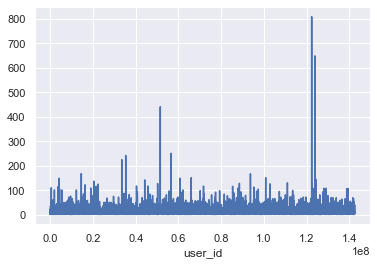

In [50]:
data_user_buy.plot(x='user_id',y='buy_count')

X轴代表user_id，Y轴是每个用户的购买次数。可以看到，大部分用户的购买次数均不超过50次，这期间还包括了双十二当天的集中购物，排除双十二高峰，实际消费次数会更少。当然也有部分用户的购买次数超过百次，甚至有超过800次的，高频消费的用户可以看作是忠实的超级用户。

# 5.ARPU分析

ARPU(Average Revenue Per User) 表示每日的收益在所有活跃用户中的转化。详细的描述为，每日的所有收益与每日的活跃的用户数量有关，因此可以通过ARPU来计算，每日活跃用户对每日收益的转化效率。

该数据集中没有对金额的体现。那我们可以对ARPU这个指标做一些修改，改为度量平台活跃用户每日平均消费次数。

计算公式为： ARPU = 每日消费总次数 / 每日活跃用户数

In [52]:
# 给数据集中每一个用户赋值一个1，表示有登录操作
data_user['action'] = 1

# 得到date、user_id、behavior_type和计算用户每日的登录次数
data_user_arpu = data_user.groupby(['date','user_id','behavior_type'])['action'].count()
data_user_arpu = data_user_arpu.reset_index()
data_user_arpu.head(20)

,date,user_id,behavior_type,action
0,2014-11-18,4913,1,27
1,2014-11-18,4913,2,1
2,2014-11-18,7591,1,4
3,2014-11-18,12645,1,25
4,2014-11-18,54056,1,13
5,2014-11-18,54056,2,1
6,2014-11-18,54056,4,1
7,2014-11-18,79824,1,40
8,2014-11-18,79824,4,2
9,2014-11-18,88930,1,75


In [53]:
# 计算arpu，近似公式：ARPU=每日消费次数/每日活跃用户数
arpu = data_user_arpu.groupby('date').apply(lambda x:x[x['behavior_type']==4]['action'].sum()/len(x['user_id'].unique()))
arpu

date
2014-11-18    0.588050
2014-11-19    0.574143
2014-11-20    0.546660
2014-11-21    0.481358
2014-11-22    0.577016
2014-11-23    0.525184
2014-11-24    0.526025
2014-11-25    0.545426
2014-11-26    0.562058
2014-11-27    0.577135
2014-11-28    0.519955
2014-11-29    0.515906
2014-11-30    0.566860
2014-12-01    0.597341
2014-12-02    0.552824
2014-12-03    0.589977
2014-12-04    0.565151
2014-12-05    0.521282
2014-12-06    0.508075
2014-12-07    0.507007
2014-12-08    0.520871
2014-12-09    0.525282
2014-12-10    0.483464
2014-12-11    0.467943
2014-12-12    1.975518
2014-12-13    0.513282
2014-12-14    0.522346
2014-12-15    0.554590
2014-12-16    0.560410
2014-12-17    0.544182
2014-12-18    0.544819
dtype: float64

Text(0.5, 1.0, 'ARPU')

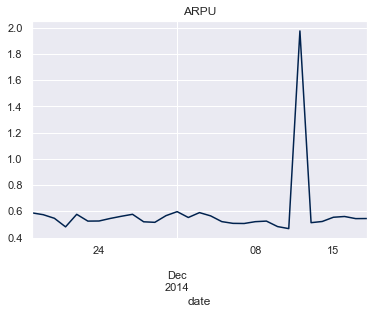

In [54]:
# 可视化
arpu.plot(colormap='cividis')
plt.title('ARPU')

可以看到，活跃用户每天平均消费在0.5次左右，双十二期间达到最高值接近2，是平时的4倍左右，表明用户会集中在大促日的时候购买。

In [56]:
# 计算ARPU过程中，分子使用的是购买累计次数，如果分子只统计购买的用户数，那么就能得到下单率
arpu01 = data_user_arpu.groupby('date').apply(lambda x:x[x['behavior_type']==4]['user_id'].sum()/len(x['user_id'].unique()))
arpu01

date
2014-11-18    1.736927e+07
2014-11-19    1.703726e+07
2014-11-20    1.727443e+07
2014-11-21    1.506412e+07
2014-11-22    1.648248e+07
2014-11-23    1.629587e+07
2014-11-24    1.667332e+07
2014-11-25    1.678967e+07
2014-11-26    1.687211e+07
2014-11-27    1.726798e+07
2014-11-28    1.654388e+07
2014-11-29    1.586272e+07
2014-11-30    1.735813e+07
2014-12-01    1.783912e+07
2014-12-02    1.743714e+07
2014-12-03    1.856990e+07
2014-12-04    1.727010e+07
2014-12-05    1.692349e+07
2014-12-06    1.592578e+07
2014-12-07    1.519877e+07
2014-12-08    1.687888e+07
2014-12-09    1.583577e+07
2014-12-10    1.552375e+07
2014-12-11    1.498400e+07
2014-12-12    3.632368e+07
2014-12-13    1.637895e+07
2014-12-14    1.630891e+07
2014-12-15    1.721791e+07
2014-12-16    1.760508e+07
2014-12-17    1.671157e+07
2014-12-18    1.719244e+07
dtype: float64

Text(0.5, 1.0, 'ARPU')

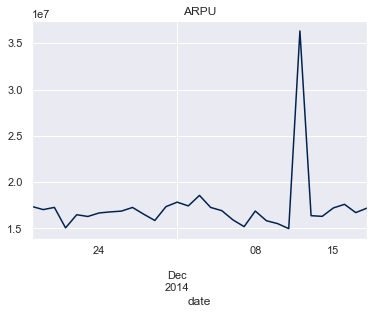

In [57]:
# 可视化
arpu01.plot(colormap='cividis')
plt.title('ARPU')

可以看到，活跃用户每天的下单数在1.5-2之间，双十二期间达到最高值接近4，是平时的2倍左右。


# 6.ARPPU分析

In [58]:
# 计算每日的所有用户的购买次数
data_user_arppu = data_user[data_user['behavior_type']==4].groupby(['date','user_id'])['behavior_type'].count()
data_user_arppu = data_user_arppu.reset_index().rename(columns={'behavior_type':'buy_count'})
data_user_arppu.head()

,date,user_id,buy_count
0,2014-11-18,54056,1
1,2014-11-18,79824,2
2,2014-11-18,88930,2
3,2014-11-18,247543,5
4,2014-11-18,475826,3


In [59]:
# 计算ARPPU
data_user_arppu = data_user_arppu.groupby('date').apply(lambda x:x['buy_count'].sum()/x['user_id'].count())
data_user_arppu

date
2014-11-18    2.423652
2014-11-19    2.439444
2014-11-20    2.320375
2014-11-21    2.271429
2014-11-22    2.530120
2014-11-23    2.330780
2014-11-24    2.248031
2014-11-25    2.313961
2014-11-26    2.402824
2014-11-27    2.403405
2014-11-28    2.231623
2014-11-29    2.331881
2014-11-30    2.357236
2014-12-01    2.359083
2014-12-02    2.284543
2014-12-03    2.289334
2014-12-04    2.328707
2014-12-05    2.223041
2014-12-06    2.253444
2014-12-07    2.320741
2014-12-08    2.204384
2014-12-09    2.413576
2014-12-10    2.230236
2014-12-11    2.226363
2014-12-12    3.913523
2014-12-13    2.245320
2014-12-14    2.312749
2014-12-15    2.313460
2014-12-16    2.285455
2014-12-17    2.302548
2014-12-18    2.310567
dtype: float64

Text(0.5, 1.0, 'ARPPU')

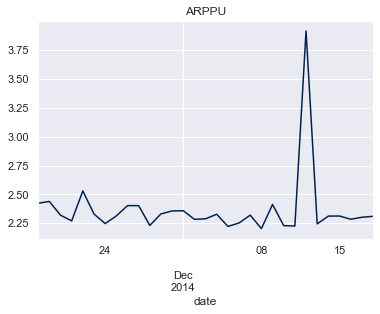

In [60]:
data_user_arppu.plot(colormap='cividis')
plt.title('ARPPU')

可以看到，针对活跃的下单用户来讲，平均每日消费次数在2-2.5次之间波动，双十二当天该数值达超过3.75，一个可能的原因是用户会在平时把喜欢的商品进行加购，等到双十二促销当天再下单购买。



# 7. 复购情况分析

一般来说，复购是指对产品的重复购买行为。但是这个定义在商业上是不精确的，假若一个用户在一天内多次在淘宝购买商品，不能说明这件用户对淘宝的依赖（有可能是某位用户只是第一次用，但是买的量大）。因此商业分析过程中，对于复购行为进行明确的定义。这里的复购是指：两天以上都在该平台产生了购买行为，需要指出一天多次的购买不算是复购。

因此复购率的计算方式为：复购率 = 复购用户数量 / 有购买行为的用户数量。

In [61]:
# 计算用户购买频次
data_user_pay = data_user[data_user.behavior_type==4]
# 基于data去重，得到的结果即为购物分布的天数：
data_user_pay = data_user_pay.groupby('user_id')['date'].apply(lambda x:len(x.unique()))
data_user_pay

user_id
4913         5
6118         1
7528         6
7591         9
12645        4
            ..
142376113    1
142412247    7
142430177    5
142450275    8
142455899    7
Name: date, Length: 8886, dtype: int64

In [62]:
# 计算复购率
repeat_buy_ratio = data_user_pay[data_user_pay > 1].count()/data_user_pay.count()
repeat_buy_ratio

0.8717083051991897

说明这批抽样数据在1个月内的复购率还是相当高的，达到了0.87.

# 8.复购周期分析

除了以上对复购频次的统计，还需要对复购意向做进一步的探究，想要知道用户多久复购一次 ，这个数据有助于淘宝产品宣传在这个时间间隔内采取策略，增加用户的复购意向，最终转化为实际收益。

In [64]:
data_user['action'] = 1 # 对每一行的行为记为1次，通过对行为次数的相加，从而计算频次
data_user_buy = data_user[data_user.behavior_type==4]
data_user_buy = data_user_buy.groupby(['user_id','date'])['action'].count()
data_user_buy = data_user_buy.reset_index()
data_user_buy.head(20)

,user_id,date,action
0,4913,2014-12-01,1
1,4913,2014-12-07,2
2,4913,2014-12-11,1
3,4913,2014-12-13,1
4,4913,2014-12-16,1
5,6118,2014-12-17,1
6,7528,2014-11-22,1
7,7528,2014-11-26,1
8,7528,2014-11-27,1
9,7528,2014-11-30,1


In [65]:
# 对日期排序（按照先后顺序），给予pandas的date函数计算前后两次购物相差的天数，dropna去掉了每个用户在数据集周期内第一次购买日期的记录：
data_user_buy_date_diff = data_user_buy.groupby('user_id').date.apply(lambda x:x.sort_values().diff(1).dropna())

data_user_buy_date_diff.head(30)

user_id    
4913     1     6 days
         2     4 days
         3     2 days
         4     3 days
7528     7     4 days
         8     1 days
         9     3 days
         10    3 days
         11   10 days
7591     13    7 days
         14    1 days
         15    1 days
         16    2 days
         17    4 days
         18    1 days
         19    1 days
         20    1 days
12645    22    2 days
         23    4 days
         24   11 days
54056    26   19 days
79824    29    9 days
         30    8 days
         31    6 days
         32    1 days
         33    1 days
         34    3 days
88930    36    2 days
         37    2 days
         38    1 days
Name: date, dtype: timedelta64[ns]

Text(0, 0.5, 'count')

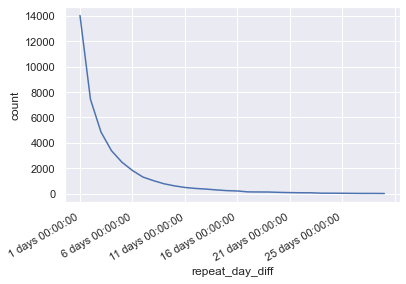

In [67]:
# 对复购间隔进行可视化
data_user_buy_date_diff.value_counts().plot(kind='line')
plt.xlabel('repeat_day_diff')
plt.ylabel('count')

In [68]:
data_user_buy_date_diff = data_user_buy_date_diff.apply(lambda x:x.days)
data_user_buy_date_diff

0        NaN
1        6.0
2        4.0
3        2.0
4        3.0
        ... 
49196    2.0
49197    2.0
49198    4.0
49199    3.0
49200    1.0
Name: date, Length: 49201, dtype: float64

Text(0, 0.5, 'count')

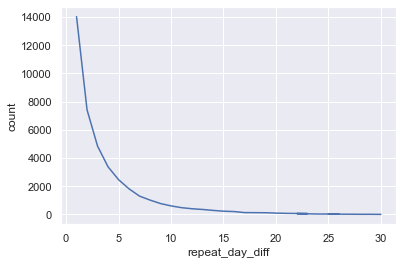

In [70]:
data_user_buy_date_diff.value_counts().plot(kind='line')
plt.xlabel('repeat_day_diff')
plt.ylabel('count')

可以看出，大部分用户的复购行为发生在5天之内，在第5天复购的行为出现了明显的拐点，可以在这个时候采取营销策略来提升用户的购买意图，增加更多收益。超过15天后，复购的意愿基本已经趋于0，此时可以考虑采取一些召回策略，增加复购的可能性，防止用户的流失。

利用该数据集还可以完成基于商品、商品类目的分析，如淘宝网top10浏览量最大/购买次数最多的商品/商品类目等